In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/book-recommendation-dataset/Ratings.csv
/kaggle/input/book-recommendation-dataset/Users.csv
/kaggle/input/book-recommendation-dataset/Books.csv


In [2]:
df_all = pd.read_csv("/kaggle/input/book-recommendation-dataset/Books.csv")
book_rating_all = pd.read_csv("/kaggle/input/book-recommendation-dataset/Ratings.csv")
book_users_all = pd.read_csv("/kaggle/input/book-recommendation-dataset/Users.csv")
df = df_all.iloc[:100000, :]
book_rating = book_rating_all.iloc[:100000, :]
book_users = book_users_all.iloc[:100000, :]
book_ratings = book_rating.iloc[:, 0:3]
book_ratings.rename(columns={"User-ID" : "user_id", "Book-Rating" : "book_rating"}, inplace=True)
df = pd.merge(df, book_ratings, on="ISBN")
df = df.reindex(columns=["ISBN", "user_id", "Book-Title", "Book-Author", "Year-Of-Publication", "Publisher", "book_rating", "Image-URL-S", "Image-URL-M", "Image-URL-L"])
print (df.shape)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(79319, 10)


In [3]:
# visualisation
df.groupby('Book-Title')['book_rating'].describe().sort_values("mean", ascending = False).head(10)

,count,mean,std,min,25%,50%,75%,max
Book-Title,,,,,,,,
Lake Powell: A Different Light,1.0,10.0,NaN,10.0,10.0,10.0,10.0,10.0
"Cardcaptor Sakura: Master of the Clow (Cardcaptor Sakura, 3)",1.0,10.0,NaN,10.0,10.0,10.0,10.0,10.0
"Cardcaptor Sakura: Master of the Clow, Book 4",1.0,10.0,NaN,10.0,10.0,10.0,10.0,10.0
"Cardcaptor Sakura: Master of the Clow, Book 5",1.0,10.0,NaN,10.0,10.0,10.0,10.0,10.0
Uncle John's All-Purpose Extra-Strength Bathroom Reader (Uncle John's Bathroom Reader #13),1.0,10.0,NaN,10.0,10.0,10.0,10.0,10.0
Life in a Rapidly Changing World (New Economy Self-Development),1.0,10.0,NaN,10.0,10.0,10.0,10.0,10.0
Sea Dancers,1.0,10.0,NaN,10.0,10.0,10.0,10.0,10.0
"Life You've Always Wanted, The",1.0,10.0,NaN,10.0,10.0,10.0,10.0,10.0
Caring for Your Aging Parents: A Planning and Action Guide,1.0,10.0,NaN,10.0,10.0,10.0,10.0,10.0


In [4]:
df["count"] = df.groupby('Book-Title')['book_rating'].transform("count")
df["more_than_one"] = np.where(df["count"] > 1, 1, 0)
df = df[df["more_than_one"] == 1]
df = df.drop("count", 1)
df = df.drop("more_than_one", axis = 1)
print (df.shape)

(50079, 10)


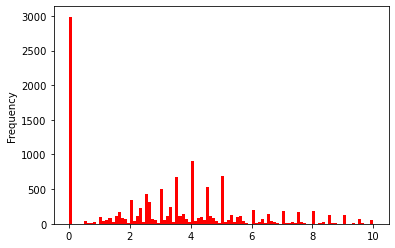

In [5]:
ratings_df_mean = df.groupby('Book-Title')['book_rating'].describe()['mean']
ratings_df_count = df.groupby('Book-Title')['book_rating'].describe()['count']
ratings_mean_count_df = pd.concat([ratings_df_count, ratings_df_mean], axis = 1)
ratings_mean_count_df['mean'].plot(bins=100, kind='hist', color = 'r') 

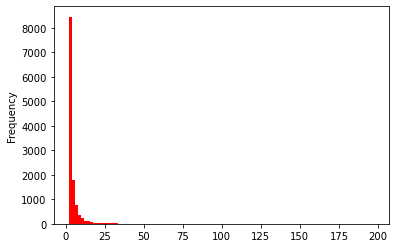

In [6]:
ratings_mean_count_df['count'].plot(bins=100, kind='hist', color = 'r') 

In [7]:
userid_booktitle_matrix = df.pivot_table(index = 'user_id', columns = 'Book-Title', values = 'book_rating')


In [8]:
userid_booktitle_matrix.sample()

Book-Title,'Salem's Lot,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,".Hack: //Legend of the Twilight, Vol. 1",".Hack: //Legend of the Twilight, Vol. 2",01-01-00: A Novel of the Millennium,01-01-00: The Novel of the Millennium,"1,003 Great Things About Kids","1,401 More Things That P*Ss Me Off",10 Secrets for Success and Inner Peace,100 Best-Loved Poems (Dover Thrift Editions),...,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""","\The Happy Prince\"" and Other Stories (Penguin Popular Classics)""",e,eXistenZ: A Novelization,iI Paradiso Degli Orchi,stardust,the Heiress Bride (sister brides),why I'm like this : True Stories,"Â¿QuÃ© me quieres, amor?"
user_id,,,,,,,,,,,,,,,,,,,,,
11087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
selected = "stardust"

selection = userid_booktitle_matrix[selected]

# Let's calculate the correlations
selection_correlations = pd.DataFrame(userid_booktitle_matrix.corrwith(selection), columns=['Correlation'])
selection_correlations = selection_correlations.join(ratings_mean_count_df['count'])
                                      
selection_correlations.dropna(inplace=True)
# Let's sort the correlations vector
                                      
selection_correlations[selection_correlations['count']>0].sort_values('Correlation',ascending=False).head()

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,count
Book-Title,,
Neanderthal,1.0,6.0
The Joy Luck Club,1.0,50.0
Great Dialogues of Plato,1.0,3.0
How to Be Good,1.0,22.0
A Bend in the Road,1.0,33.0


In [10]:


bookcorrelatons = userid_booktitle_matrix.corr(method = "pearson" , min_periods = 2)


In [11]:
data = {'Book-Title': ["A Bend in the Road", "stardust" ], 'book_rating': [5, 1]}
myRatings = pd.DataFrame.from_dict(data)

similar_book_list = pd.Series()
for i in range(0, 2):
    similar_book = bookcorrelatons[myRatings['Book-Title'][i]].dropna() # Get same books with same ratings
    similar_book = similar_book.map(lambda x: x * myRatings['book_rating'][i]) # Scale the similarity by your given ratings
    similar_books_list = similar_book_list.append(similar_book)
similar_books_list.sort_values(inplace = True, ascending = False)
print (similar_books_list.head(10))

stardust                                        1.0
Masquerade                                      1.0
Four Seasons                                    1.0
Good Omens                                      1.0
Great Dialogues of Plato                        1.0
Hannibal                                        1.0
House of Sand and Fog                           1.0
How to Be Good                                  1.0
Ishmael: An Adventure of the Mind and Spirit    1.0
Le Divorce (William Abrahams Book)              1.0
dtype: float64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
